<a href="https://colab.research.google.com/github/sriram403/SkimLit_Project/blob/main/P_P_Replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I KNOW !!! 😁** *(P_P is for Pubmed_Project)*

# SkimLit 🤖📰

![Skimlit example inputs and outputs](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-skimlit-overview-input-and-output.png)

## Getting the data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
drive  pubmed-rct  sample_data


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

## Creating Directory Variables

In [ ]:
import os 
all_the_text = os.listdir(data_dir)
train_dir = data_dir+"/"+all_the_text[1]
test_dir = data_dir+"/"+all_the_text[0]
val_dir = data_dir+"/"+all_the_text[2]

## Creating a helperFunction

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def get_score(pred,true):
  acc = accuracy_score(true,pred)*100
  di = {}
  p,r,f,_ = precision_recall_fscore_support(true,pred,average="weighted")
  di["precision"] = p
  di["recall"] = r
  di["f1_score"] = f
  di["accuracy"] = acc
  return di

In [ ]:
def read_text(dir):
  with open(dir) as f:
    return f.readlines()

In [ ]:
def line_to_dict(data):
  whole_data = []
  abstract_id=0
  for i in data:
    if i.startswith("###"):
      abstract_id += 1
      abstract_sentences = ""
    elif i.isspace():
      abstract_all_sentences_splitted = abstract_sentences.splitlines()
      for i,line in enumerate(abstract_all_sentences_splitted):
        dicts =  {}
        abstract_data = line.split("\t")
        dicts["Target"] = abstract_data[0]
        dicts["text"] = abstract_data[1]
        dicts["number_of_line"] = i
        dicts["total_number_of_lines"] = len(abstract_all_sentences_splitted)-1
        whole_data.append(dicts)
    else:
      abstract_sentences += i
  return whole_data

### Getting Raw data

In [ ]:
train_raw_data = read_text(train_dir)
test_raw_data = read_text(test_dir)
val_raw_data = read_text(val_dir)

### getting dictionary formated data 

In [ ]:
train_data_dict = line_to_dict(train_raw_data)
test_data_dict = line_to_dict(test_raw_data)
val_data_dict = line_to_dict(val_raw_data)

### Changing the dictionary formated data into DataFrame

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.DataFrame(train_data_dict)
test_df = pd.DataFrame(test_data_dict)
val_df = pd.DataFrame(val_data_dict)

##Preparing the data for our Model for BASELINE

In [ ]:
train_sentences = train_df.text.tolist()
val_sentences = val_df.text.tolist()
test_sentences = test_df.text.tolist()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["Target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df.Target.to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df.Target.to_numpy().reshape(-1,1))

In [ ]:
train_df.Target.value_counts()

METHODS        9897
RESULTS        9713
CONCLUSIONS    4571
BACKGROUND     3621
OBJECTIVE      2333
Name: Target, dtype: int64

In [ ]:
train_labels_one_hot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train_labels_label_encoded = LE.fit_transform(train_df.Target.to_numpy().reshape(-1,1))
test_labels_label_encoded = LE.transform(test_df.Target.to_numpy().reshape(-1,1))
val_labels_label_encoded = LE.transform(val_df.Target.to_numpy().reshape(-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_labels_label_encoded

array([0, 4, 4, ..., 4, 4, 1])

In [ ]:
classes = LE.classes_
classes,len(classes)

(array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object), 5)

## BaseLine Model_0

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
model_0 = Pipeline([("tfidf",TfidfVectorizer()),
                     ("naive_bayes",MultinomialNB())])
model_0

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('naive_bayes', MultinomialNB())])

In [ ]:
model_0.fit(train_sentences,train_labels_label_encoded)
model_0.score(val_sentences,val_labels_label_encoded)

0.6760889712696941

In [ ]:
model_0_pred = model_0.predict(val_sentences)
model_0_pred

array([0, 1, 2, ..., 4, 4, 0])

In [ ]:
model_0_score = get_score(model_0_pred,val_labels_label_encoded)
model_0_score

{'precision': 0.6750509747444058,
 'recall': 0.6760889712696941,
 'f1_score': 0.6351051244365337,
 'accuracy': 67.60889712696941}

## ANN 

### preparing dataset for ANN(Artificial Neural Network)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
number_of_words = [len(sentence.split())for sentence in train_sentences]
average_of_words = int(np.mean(number_of_words))
average_of_words

26

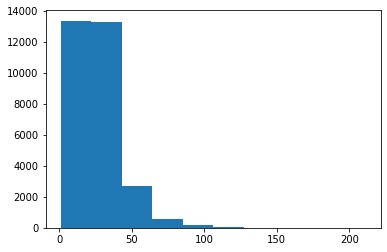

In [ ]:
plt.hist(number_of_words);

In [ ]:
np.percentile(number_of_words,95)

55.0

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
max_tokens = 68000

In [ ]:
TV = TextVectorization(max_tokens=max_tokens,output_sequence_length=55)
TV.adapt(train_sentences)

In [ ]:
all_the_vocab = TV.get_vocabulary()
fam_word = all_the_vocab[:10]
leat_fam_word = all_the_vocab[-10:]
fam_word,leat_fam_word,len(all_the_vocab)

(['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were'],
 ['abbas',
  'abandonments',
  'abandon',
  'aassociated',
  'aask',
  'aarhus',
  'aai',
  'aagg',
  'aadenosine',
  'aacr'],
 24854)

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
E = Embedding(len(all_the_vocab),output_dim=128,mask_zero=True,name="embeddinglayer")

In [ ]:
d= ["elon musk"]
t = TV(d)
e = E(t)
e

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.04985014,  0.03477547, -0.01549115, ...,  0.01309163,
          0.04881265, -0.0496699 ],
        [ 0.04985014,  0.03477547, -0.01549115, ...,  0.01309163,
          0.04881265, -0.0496699 ],
        [ 0.03335818,  0.04462457, -0.00102804, ..., -0.00186291,
         -0.00277785, -0.00699514],
        ...,
        [ 0.03335818,  0.04462457, -0.00102804, ..., -0.00186291,
         -0.00277785, -0.00699514],
        [ 0.03335818,  0.04462457, -0.00102804, ..., -0.00186291,
         -0.00277785, -0.00699514],
        [ 0.03335818,  0.04462457, -0.00102804, ..., -0.00186291,
         -0.00277785, -0.00699514]]], dtype=float32)>

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

###Model_1 Creating a Conv1D Model

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
tokenizer = TV(inputs)
embedding = E(tokenizer)
layer = tf.keras.layers.Conv1D(64,5,padding="same",activation="relu")(embedding)
x = tf.keras.layers.GlobalAveragePooling1D()(layer)
output = tf.keras.layers.Dense(len(classes),activation="softmax")(x)
model_1 = tf.keras.Model(inputs,output)
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embeddinglayer (Embedding)  (None, 55, 128)           3181312   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_1_history = model_1.fit(train_data,
                              steps_per_epoch=int(0.15*(len(train_data))),
                              epochs=3,
                              validation_data=val_data,
                              validation_steps=int(0.15*len(val_data)))

Epoch 1/3
141/141 [==============================] - 11s 11ms/step - loss: 1.3352 - accuracy: 0.4552 - val_loss: 1.0192 - val_accuracy: 0.6035
Epoch 2/3
141/141 [==============================] - 1s 10ms/step - loss: 0.8756 - accuracy: 0.6647 - val_loss: 0.7601 - val_accuracy: 0.6941
Epoch 3/3
141/141 [==============================] - 1s 8ms/step - loss: 0.7563 - accuracy: 0.7090 - val_loss: 0.6945 - val_accuracy: 0.7265


In [ ]:
model_1.evaluate(val_data)

945/945 [==============================] - 3s 3ms/step - loss: 0.7001 - accuracy: 0.7323


[0.7001038789749146, 0.732258677482605]

In [ ]:
model_1_pred = model_1.predict(val_sentences)
model_1_pred_le = tf.argmax(model_1_pred,axis=1)
model_1_pred_le

945/945 [==============================] - 2s 2ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [ ]:
model_1_score = get_score(model_1_pred_le,val_labels_label_encoded)
model_1_score

{'precision': 0.7238335381425446,
 'recall': 0.7322587051502714,
 'f1_score': 0.7220369393116212,
 'accuracy': 73.22587051502714}

###Model_2 Next Model with Transferlearning Embedding layer

In [ ]:
import tensorflow_hub as hub
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=False,name="UniversalEncoder")

In [ ]:
inputs = tf.keras.layers.Input(shape=[],dtype=tf.string)
embedding = embedding_layer(inputs)
layer = tf.keras.layers.Dense(128,activation="relu")(embedding)
output = tf.keras.layers.Dense(len(classes),activation="softmax")(layer)
model_2 = tf.keras.Model(inputs,output)
model_2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 UniversalEncoder (KerasLaye  (None, 512)              256797824 
 r)                                                              
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_2.fit(train_data,
            epochs=3,
            steps_per_epoch=int(0.1*len(train_data)),
            validation_data=val_data,
            validation_steps=int(0.1*len(val_data)))

Epoch 1/3
94/94 [==============================] - 7s 26ms/step - loss: 1.2447 - accuracy: 0.5103 - val_loss: 1.0229 - val_accuracy: 0.5971
Epoch 2/3
94/94 [==============================] - 2s 22ms/step - loss: 0.9331 - accuracy: 0.6330 - val_loss: 0.8759 - val_accuracy: 0.6642
Epoch 3/3
94/94 [==============================] - 2s 22ms/step - loss: 0.8722 - accuracy: 0.6652 - val_loss: 0.8289 - val_accuracy: 0.6795


In [ ]:
model_2_pred = model_2.predict(val_sentences)
model_2_pred_le = tf.argmax(model_2_pred,axis=1)
model_2_pred_le

945/945 [==============================] - 10s 11ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 0, ..., 4, 4, 2])>

In [ ]:
model_2_score = get_score(model_2_pred_le,val_labels_label_encoded)
model_2_score

{'precision': 0.6789899539511719,
 'recall': 0.6788693234476367,
 'f1_score': 0.670114380976344,
 'accuracy': 67.88693234476368}

### Model_3 Token and Character Level Embedding model

In [ ]:
def split_chars(texts):
  return " ".join(list(texts))
split_chars("sriram")

's r i r a m'

In [ ]:
b = " ".join(list("sriram"))

In [ ]:
train_chars = [split_chars(sentences)for sentences in train_sentences]
val_chars = [split_chars(sentences)for sentences in val_sentences]
test_chars = [split_chars(sentences)for sentences in test_sentences]

In [ ]:
char_length_all = [len(sentences)for sentences in train_sentences]
char_avg_length = np.mean(char_length_all)
char_avg_length

148.45996349759415

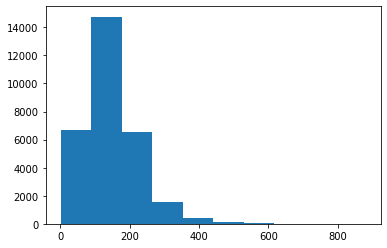

In [ ]:
plt.hist(char_length_all);

In [ ]:
np.percentile(char_length_all,95)

288.0

In [ ]:
import string 
all_keyboard_values = string.ascii_lowercase+string.digits+string.punctuation
all_keyboard_values

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
TV_CHAR = tf.keras.layers.TextVectorization(max_tokens=2+len(all_keyboard_values),
                                            output_sequence_length=288,name="char_level_TV")

In [ ]:
TV_CHAR.adapt(train_chars)
whole_char_vocab = TV_CHAR.get_vocabulary()
whole_char_vocab[:10]

['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']

In [ ]:
E_CHAR = tf.keras.layers.Embedding(input_dim=2+len(all_keyboard_values),output_dim=25,mask_zero=False,name="char_embedding")

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
tokenizer = TV_CHAR(inputs)
embedding = E_CHAR(tokenizer)
layer = tf.keras.layers.Conv1D(64,5,padding="same",name="Conv1D_Layer",activation="relu")(embedding)
x = tf.keras.layers.GlobalMaxPool1D()(layer)
output = tf.keras.layers.Dense(len(classes),activation="softmax")(x)
model_3 = tf.keras.Model(inputs,output)
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_level_TV (TextVectoriz  (None, 288)              0         
 ation)                                                          
                                                                 
 char_embedding (Embedding)  (None, 288, 25)           1750      
                                                                 
 Conv1D_Layer (Conv1D)       (None, 288, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [ ]:
train_data_chars = tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_data_chars = tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_data_chars = tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_3.fit(train_data_chars,epochs=3,steps_per_epoch=int(0.1*len(train_data_chars)),
            validation_data=val_data_chars,validation_steps=int(0.1*len(val_data_chars)))

Epoch 1/3
94/94 [==============================] - 1s 10ms/step - loss: 1.4796 - accuracy: 0.3557 - val_loss: 1.4461 - val_accuracy: 0.3358
Epoch 2/3
94/94 [==============================] - 1s 8ms/step - loss: 1.4105 - accuracy: 0.4269 - val_loss: 1.3659 - val_accuracy: 0.4545
Epoch 3/3
94/94 [==============================] - 1s 8ms/step - loss: 1.3298 - accuracy: 0.4641 - val_loss: 1.2462 - val_accuracy: 0.4970


In [ ]:
model_3_pred = model_3.predict(val_chars)
model_3_pred_le = tf.argmax(model_3_pred,axis=1)
model_3_pred_le

945/945 [==============================] - 3s 3ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([2, 2, 2, ..., 4, 2, 2])>

In [ ]:
model_3_score = get_score(model_3_pred_le,val_labels_label_encoded)
model_3_score

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'precision': 0.41243160027639275,
 'recall': 0.5010260823513836,
 'f1_score': 0.4320623280658354,
 'accuracy': 50.102608235138355}

### Model_4 Combination of Pretrained TokenEmbedding + Character Embedding 

In [ ]:
token_inputs = tf.keras.layers.Input(shape=[],dtype=tf.string,name="hub_inputs")
hub_layer = embedding_layer(token_inputs)
layer = tf.keras.layers.Dense(128,activation="relu",name="hub_Dense_layer")(hub_layer)
token_output = tf.keras.layers.Dense(len(classes),activation="softmax",name="hub_output_layer")(layer)
token_model = tf.keras.Model(token_inputs,token_output,name="hub_final_model")

char_inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string,name="char_inputs")
char_token = TV_CHAR(char_inputs)
char_embedding = E_CHAR(char_token)
layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25),name="char_bidirectional")(char_embedding)
char_output = tf.keras.layers.Dense(len(classes),activation="softmax",name="char_output_layer")(layer)
char_model = tf.keras.Model(char_inputs,char_output,name="char_final_model")

concate = tf.keras.layers.Concatenate(name="HubAndChar_Combined")([token_model.output,char_model.output])

drop = tf.keras.layers.Dropout(0.5,name="first_dropout")(concate)
layer = tf.keras.layers.Dense(128,activation="relu",name="middle_layer")(drop)
a_drop = tf.keras.layers.Dropout(0.4,name="final_dropout")(layer)
final_output = tf.keras.layers.Dense(len(classes),activation="softmax",name="final_output_layer")(a_drop)

Model_4 = tf.keras.Model(inputs=[token_inputs,char_inputs],outputs=final_output,name="final_model")
Model_4.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="adam")
Model_4.summary()

Model: "final_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 hub_inputs (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 char_level_TV (TextVectorizati  (None, 288)         0           ['char_inputs[0][0]']            
 on)                                                                                              
                                                                                                  
 UniversalEncoder (KerasLayer)  (None, 512)          256797824   ['hub_inputs[0][0]']   

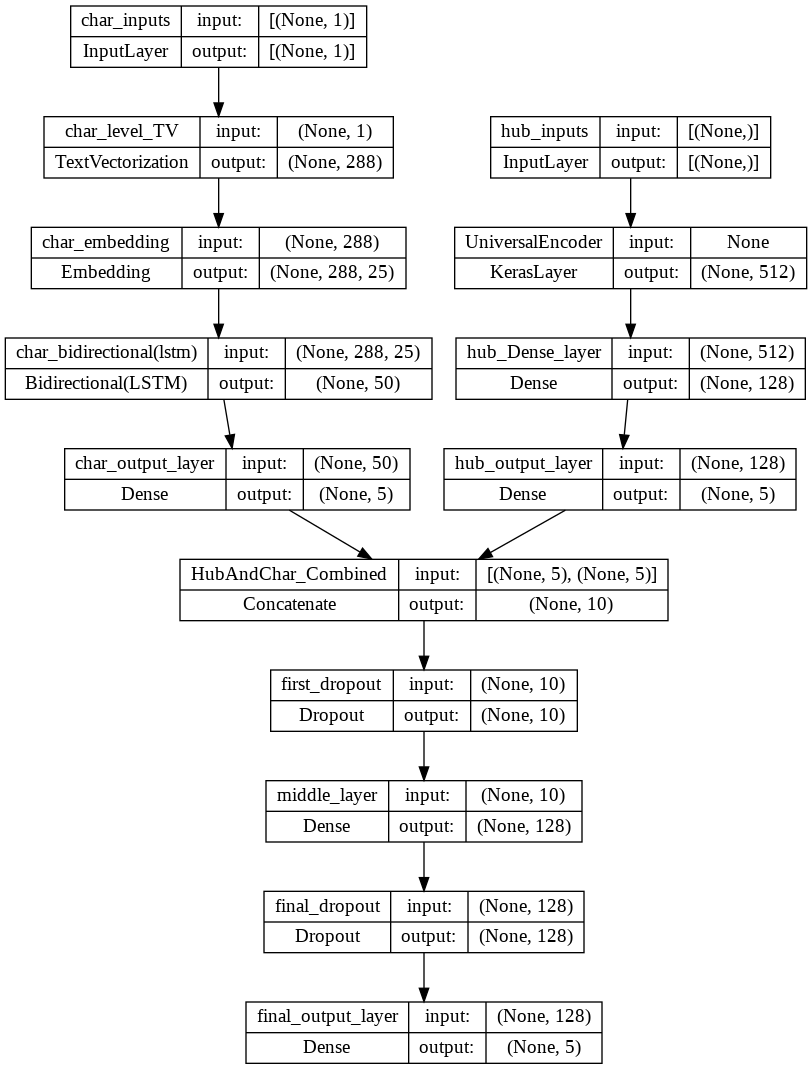

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(Model_4,show_shapes=True)

In [ ]:
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_token_char_label = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_data,train_token_char_label))
train_char_token_data = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_char_token_data = tf.data.Dataset.from_tensor_slices(((val_sentences,val_chars),val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_token_data = tf.data.Dataset.from_tensor_slices(((test_sentences,test_chars),test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
Model_4.fit(train_char_token_data,epochs=5,steps_per_epoch=int(0.1*len(train_char_token_data)),
            validation_data=val_char_token_data,validation_steps=int(0.1*len(val_char_token_data)))

Epoch 1/5
94/94 [==============================] - 10s 63ms/step - loss: 1.4897 - accuracy: 0.3388 - val_loss: 1.4166 - val_accuracy: 0.4980
Epoch 2/5
94/94 [==============================] - 5s 51ms/step - loss: 1.3624 - accuracy: 0.4029 - val_loss: 1.1757 - val_accuracy: 0.5874
Epoch 3/5
94/94 [==============================] - 5s 51ms/step - loss: 1.2692 - accuracy: 0.4465 - val_loss: 1.0957 - val_accuracy: 0.6114
Epoch 4/5
94/94 [==============================] - 5s 52ms/step - loss: 1.2238 - accuracy: 0.4638 - val_loss: 1.0416 - val_accuracy: 0.6193
Epoch 5/5
94/94 [==============================] - 5s 51ms/step - loss: 1.2003 - accuracy: 0.4751 - val_loss: 1.0387 - val_accuracy: 0.6207


In [ ]:
model_4_pred = Model_4.predict(val_char_token_data)
model_4_pred_le = tf.argmax(model_4_pred,axis=1)
model_4_pred_le

945/945 [==============================] - 21s 21ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 1, ..., 4, 4, 2])>

In [ ]:
model_4_score = get_score(model_4_pred_le,val_labels_label_encoded)
model_4_score

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'precision': 0.5479395717219857,
 'recall': 0.6287567853832914,
 'f1_score': 0.5771451273820791,
 'accuracy': 62.87567853832914}

###Model_5 All_of_them = Positional_Feature+Pretrained_Embedding+Character_Embedding

In [ ]:
train_df["number_of_line"].value_counts()

0     2500
1     2500
2     2500
3     2500
4     2498
5     2489
6     2458
7     2394
8     2239
9     1985
10    1679
11    1322
12     996
13     711
14     496
15     336
16     211
17     131
18      85
19      49
20      26
21      13
22       5
23       4
24       4
25       2
26       1
27       1
Name: number_of_line, dtype: int64

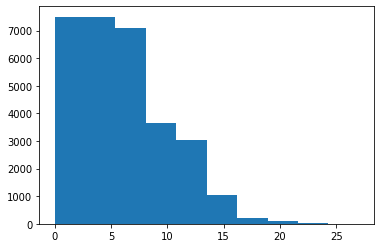

In [ ]:
plt.hist(train_df.number_of_line);

In [ ]:
np.percentile(train_df.number_of_line,98)

15.0

In [ ]:
train_df.total_number_of_lines.value_counts()

10    3927
11    3912
12    3705
9     3060
13    3010
14    2400
8     2286
15    2000
16    1360
7     1240
17     828
18     684
19     460
6      448
20     273
5      186
21     176
24      50
4       45
27      28
25      26
22      23
3        8
Name: total_number_of_lines, dtype: int64

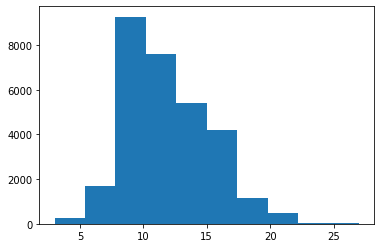

In [ ]:
plt.hist(train_df.total_number_of_lines);

In [ ]:
np.percentile(train_df.total_number_of_lines,98)

19.0

In [ ]:
train_line_numbers = tf.one_hot(train_df.number_of_line.to_numpy(),depth=15)
val_line_numbers = tf.one_hot(val_df.number_of_line.to_numpy(),depth=15)
test_line_numbers = tf.one_hot(test_df.number_of_line.to_numpy(),depth=15)

In [ ]:
train_total_lines = tf.one_hot(train_df.total_number_of_lines.to_numpy(),depth=20)
val_total_lines = tf.one_hot(val_df.total_number_of_lines.to_numpy(),depth=20)
test_total_lines = tf.one_hot(test_df.total_number_of_lines.to_numpy(),depth=20)

In [ ]:
token_inputs = tf.keras.layers.Input(shape=[],dtype=tf.string,name="hub_inputs")
hub_layer = embedding_layer(token_inputs)
layer = tf.keras.layers.Dense(128,activation="relu",name="hub_Dense_layer")(hub_layer)
token_output = tf.keras.layers.Dense(len(classes),activation="softmax",name="hub_output_layer")(layer)
token_model = tf.keras.Model(token_inputs,token_output,name="hub_final_model")

char_inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string,name="char_inputs")
char_token = TV_CHAR(char_inputs)
char_embedding = E_CHAR(char_token)
layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25),name="char_bidirectional")(char_embedding)
char_output = tf.keras.layers.Dense(len(classes),activation="softmax",name="char_output_layer")(layer)
char_model = tf.keras.Model(char_inputs,char_output,name="char_final_model")

line_inputs = tf.keras.layers.Input(shape=(15,),dtype=tf.int32)
layer = tf.keras.layers.Dense(32,activation="relu")(line_inputs)
line_model = tf.keras.Model(line_inputs,layer)

total_line_inputs = tf.keras.layers.Input(shape=(20,),dtype=tf.int32)
layer = tf.keras.layers.Dense(32,activation="relu")(total_line_inputs)
total_line_model = tf.keras.Model(total_line_inputs,layer)

char_token_concatenate = tf.keras.layers.Concatenate(name="char_token_combined")([token_model.output,char_model.output])
dense_layer = tf.keras.layers.Dense(128,activation="relu")(char_token_concatenate)
dropout = tf.keras.layers.Dropout(0.5)(dense_layer)

line_total_line_concatenate = tf.keras.layers.Concatenate(name="line_total_line_combined")([line_model.output,total_line_model.output,dropout])
dense_layer = tf.keras.layers.Dense(128,activation="relu")(line_total_line_concatenate)
output_layer = tf.keras.layers.Dense(len(classes),activation="softmax")(dense_layer)

Model_5 = tf.keras.Model(inputs=[token_inputs,char_inputs,line_inputs,total_line_inputs],
                         outputs=output_layer)

Model_5.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics="accuracy")
Model_5.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 hub_inputs (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 char_level_TV (TextVectorizati  (None, 288)         0           ['char_inputs[0][0]']            
 on)                                                                                              
                                                                                                  
 UniversalEncoder (KerasLayer)  (None, 512)          256797824   ['hub_inputs[0][0]']       

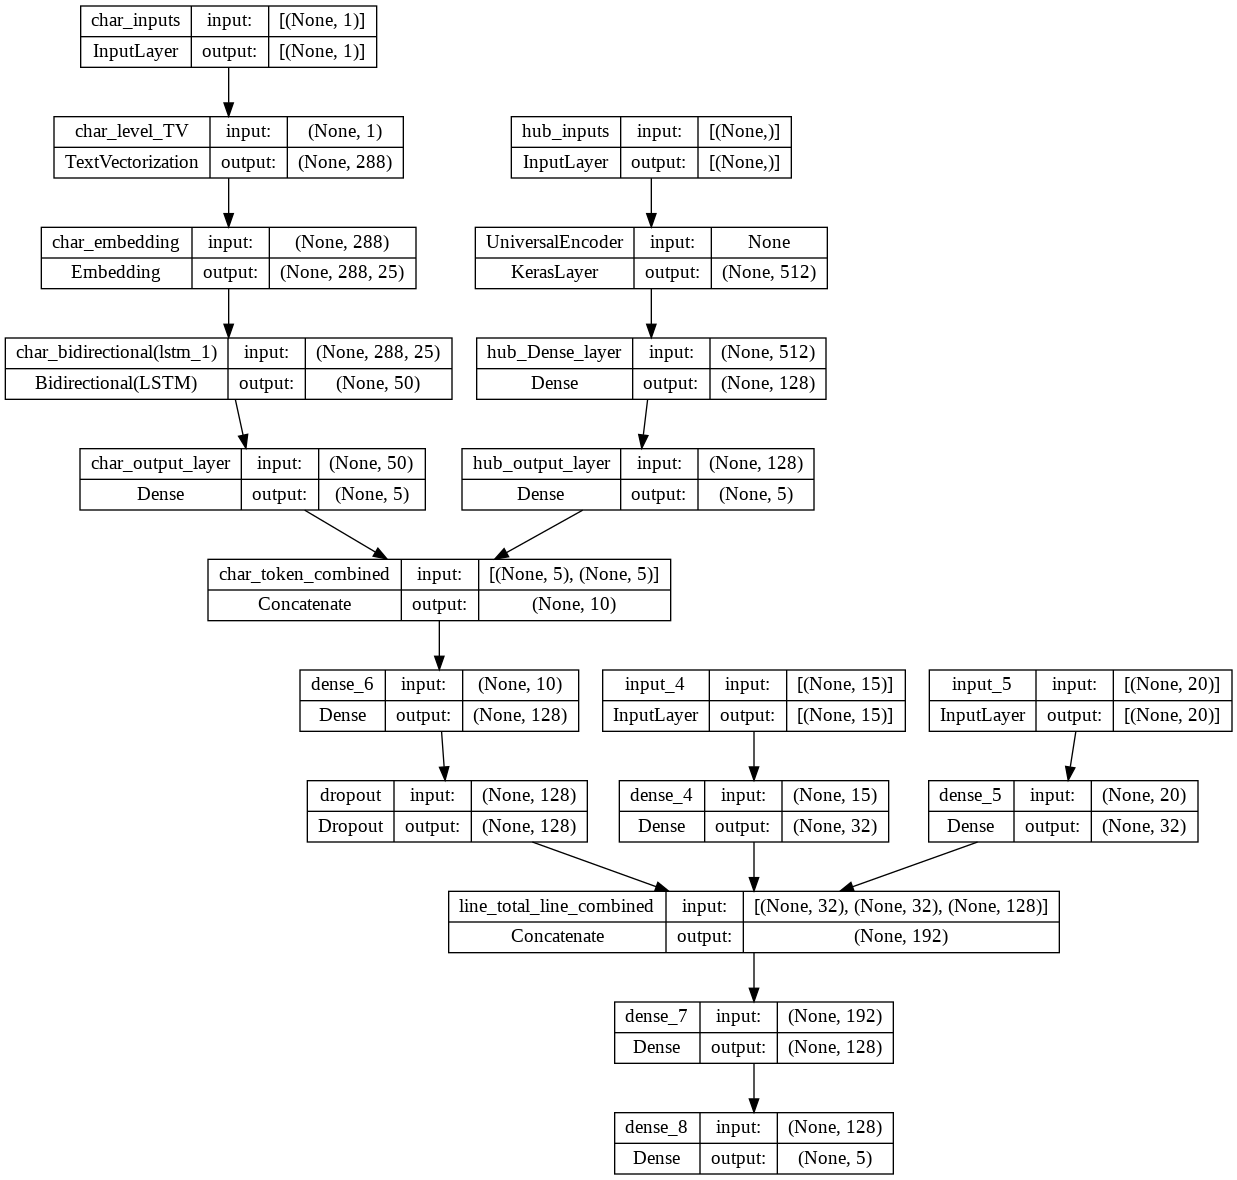

In [ ]:
plot_model(Model_5,show_shapes=True)

In [ ]:
train_whole_dataset = tf.data.Dataset.from_tensor_slices(((train_sentences,train_chars,train_line_numbers,train_total_lines),train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_whole_dataset = tf.data.Dataset.from_tensor_slices(((test_sentences,test_chars,test_line_numbers,test_total_lines),test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_whole_dataset = tf.data.Dataset.from_tensor_slices(((val_sentences,val_chars,val_line_numbers,val_total_lines),val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
Model_5.fit(train_whole_dataset,epochs=5,steps_per_epoch=int(0.1*len(train_whole_dataset)),
            validation_data=val_whole_dataset,validation_steps=int(0.1*len(val_whole_dataset)))

Epoch 1/5
94/94 [==============================] - 10s 65ms/step - loss: 1.3323 - accuracy: 0.4538 - val_loss: 1.0884 - val_accuracy: 0.5549
Epoch 2/5
94/94 [==============================] - 5s 53ms/step - loss: 0.8621 - accuracy: 0.6602 - val_loss: 0.7073 - val_accuracy: 0.7197
Epoch 3/5
94/94 [==============================] - 7s 71ms/step - loss: 0.6879 - accuracy: 0.7237 - val_loss: 0.5856 - val_accuracy: 0.7573
Epoch 4/5
94/94 [==============================] - 7s 71ms/step - loss: 0.6182 - accuracy: 0.7543 - val_loss: 0.5567 - val_accuracy: 0.7600
Epoch 5/5
94/94 [==============================] - 5s 53ms/step - loss: 0.5846 - accuracy: 0.7626 - val_loss: 0.5373 - val_accuracy: 0.7872


In [ ]:
model_5_pred = Model_5.predict(val_whole_dataset)
model_5_pred_le = tf.argmax(model_5_pred,axis=1)
model_5_pred_le

945/945 [==============================] - 21s 21ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 0, 3, ..., 4, 4, 2])>

In [ ]:
model_5_score = get_score(model_5_pred_le,val_labels_label_encoded)
model_5_score

{'precision': 0.7779906825799355,
 'recall': 0.7826691380908248,
 'f1_score': 0.779456054738793,
 'accuracy': 78.26691380908248}

##Model Performance

In [ ]:
all_metrics_df = pd.DataFrame({"BaseLine":model_0_score,"Conv1D":model_1_score,"TF_Embedding":model_2_score,"T_C":model_3_score,"TF_T_C":model_4_score,"ALL":model_5_score})
all_metrics_df = all_metrics_df.transpose()

In [ ]:
all_metrics_df

,precision,recall,f1_score,accuracy
BaseLine,0.675051,0.676089,0.635105,67.608897
Conv1D,0.723834,0.732259,0.722037,73.225871
TF_Embedding,0.678990,0.678869,0.670114,67.886932
T_C,0.412432,0.501026,0.432062,50.102608
TF_T_C,0.547940,0.628757,0.577145,62.875679
ALL,0.777991,0.782669,0.779456,78.266914


In [ ]:
all_metrics_df["accuracy"] = all_metrics_df["accuracy"]/100
all_metrics_df

,precision,recall,f1_score,accuracy
BaseLine,0.675051,0.676089,0.635105,0.676089
Conv1D,0.723834,0.732259,0.722037,0.732259
TF_Embedding,0.678990,0.678869,0.670114,0.678869
T_C,0.412432,0.501026,0.432062,0.501026
TF_T_C,0.547940,0.628757,0.577145,0.628757
ALL,0.777991,0.782669,0.779456,0.782669


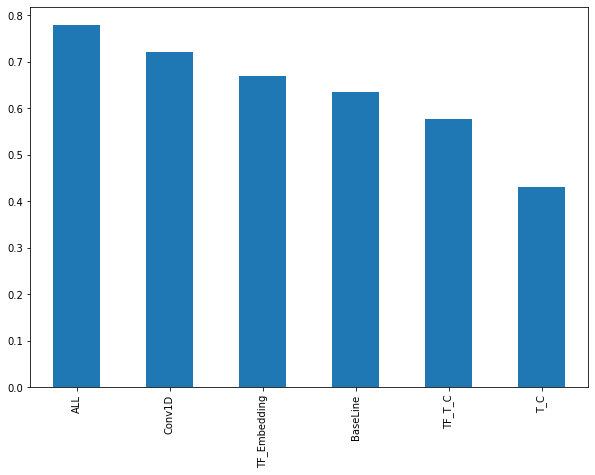

In [ ]:
all_metrics_df.sort_values("f1_score",ascending=False)["f1_score"].plot(kind="bar",figsize=(10,7))

##Saving the model(take the model from here don't train it if you don't want to)

In [ ]:
# Model_5.save("SkimLit_Model_V1")

In [ ]:
# !cp SkimLit_Model_V1 -r /content/drive/MyDrive/tensorflow_course/skim_lit

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# import tensorflow_hub as hub

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/tensorflow_course/skim_lit/SkimLit_Model_V1",custom_objects={"KerasLayer":hub.KerasLayer,
                                                                                                                              "TextVectorizer":TextVectorization})


In [ ]:
model_pred = loaded_model.predict(val_whole_dataset,verbose=1)
model_pred_le = tf.argmax(model_pred,axis=1)
model_score = get_score(model_pred_le,val_labels_label_encoded)
model_score

945/945 [==============================] - 24s 23ms/step


{'precision': 0.7797417392065226,
 'recall': 0.7829339335363432,
 'f1_score': 0.7781892387069813,
 'accuracy': 78.29339335363431}

##Test Data Evaluation

In [ ]:
test_pred = loaded_model.predict(test_whole_dataset)
test_pred_le = tf.argmax(test_pred,axis=1)
test_score = get_score(test_pred_le,test_labels_label_encoded)
test_score

5627/5627 [==============================] - 160s 28ms/step


{'precision': 0.7760505043812413,
 'recall': 0.7801266385247723,
 'f1_score': 0.7754857262599538,
 'accuracy': 78.01266385247723}

In [ ]:
test_predicted_classes = [LE.classes_[pred]for pred in test_pred_le]
test_df["prediction"] = test_predicted_classes
test_df["pred_prob"] = tf.reduce_max(test_pred,axis=1).numpy()
test_df

,Target,text,number_of_line,total_number_of_lines,prediction,pred_prob
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,11,BACKGROUND,0.532887
1,METHODS,A total of @ patients with primary knee OA wer...,1,11,METHODS,0.918631
2,METHODS,Outcome measures included pain reduction and i...,2,11,METHODS,0.407287
3,METHODS,Pain was assessed using the visual analog pain...,3,11,METHODS,0.920050
4,METHODS,Secondary outcome measures included the Wester...,4,11,METHODS,0.904681
...,...,...,...,...,...,...
180035,RESULTS,For the absolute change in percent atheroma vo...,7,11,RESULTS,0.977246
180036,RESULTS,"For PAV , a significantly greater percentage o...",8,11,RESULTS,0.984557
180037,RESULTS,Both strategies had acceptable side effect pro...,9,11,CONCLUSIONS,0.846164
180038,CONCLUSIONS,"Compared with standard statin monotherapy , th...",10,11,RESULTS,0.549868


###Top Wrong Prediction

In [ ]:
top_wrong_predictions = test_df[test_df["prediction"]!=test_df["Target"]].sort_values("pred_prob",ascending=False)
top_wrong_predictions

,Target,text,number_of_line,total_number_of_lines,prediction,pred_prob
62258,METHODS,Motor block was significantly higher in group ...,7,10,RESULTS,0.988417
48234,METHODS,Mean PDC was higher in the INT group ( @ vs @ ...,8,13,RESULTS,0.988347
65817,BACKGROUND,No significant correlation was noted between v...,8,11,RESULTS,0.987833
152043,METHODS,Values were considered statistically significa...,8,12,RESULTS,0.987580
18528,CONCLUSIONS,"Compared to SJ , F-v relationships were shifte...",6,7,RESULTS,0.987438
...,...,...,...,...,...,...
93929,METHODS,The project has been approved by the Ethical C...,12,14,CONCLUSIONS,0.261443
30961,CONCLUSIONS,Adding chest compressions to mask ventilation ...,4,5,METHODS,0.261316
101198,RESULTS,The VIVO Harvester correctly identified only a...,4,9,METHODS,0.258111
131049,CONCLUSIONS,The need for RCTs assessing higher doses of vi...,4,5,METHODS,0.253485


In [ ]:
for rows in top_wrong_predictions[:10].itertuples():
  _,Target,text,_,_,pred,pred_prob = rows
  print(f"the original class is {Target}")
  print(f"the text is :\n {text}")
  print(f"the prediction is : {pred} , {pred_prob*100:.2f}%")
  print(f"{'='*40}")


the original class is METHODS
the text is :
 Motor block was significantly higher in group B ( P < @ ) .
the prediction is : RESULTS , 98.84%
the original class is METHODS
the text is :
 Mean PDC was higher in the INT group ( @ vs @ ; P < @ ) .
the prediction is : RESULTS , 98.83%
the original class is BACKGROUND
the text is :
 No significant correlation was noted between valvular @F-FDG uptake and change in calcium score ( r = -@ ; P = @ ) .
the prediction is : RESULTS , 98.78%
the original class is METHODS
the text is :
 Values were considered statistically significant at a p < @ .
the prediction is : RESULTS , 98.76%
the original class is CONCLUSIONS
the text is :
 Compared to SJ , F-v relationships were shifted to the right in CMJ , with higher P max , maximal theoretical force and velocity ( +@ , @ and @ % , respectively ) .
the prediction is : RESULTS , 98.74%
the original class is METHODS
the text is :
 At the end of the @th week , Vm was increased much significantly ( all P < @

##Custom Data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

--2022-12-26 05:25:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2022-12-26 05:25:51 (54.1 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



In [ ]:
import json
with open("skimlit_example_abstracts.json","r")as f:
  example_abstract = json.load(f)
example_abstract

[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [ ]:
abstracts = pd.DataFrame(example_abstract)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [ ]:
from spacy.lang.en import English

In [ ]:
nlp = English()
nlp.add_pipe("sentencizer")
doc = nlp(abstracts["abstract"][0])
doc

This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.

In [ ]:
abstract_line = [str(sent)for sent in list(doc.sents)]
abstract_line

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [ ]:
total_line_number = len(abstract_line)
sample_text = []
for i,lines in enumerate(abstract_line):
  dic = {}
  dic["text"] = lines
  dic["line_number"] = i
  dic["total_line_number"] = total_line_number-1
  sample_text.append(dic)
sample_text

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_line_number': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_line_number': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_line_number': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_line_number': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_line_number': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,

In [ ]:
test_abstract_lines_number = [line["line_number"]for line in sample_text]
test_abstract_lines_number_one_hot = tf.one_hot(test_abstract_lines_number,depth=15)
test_abstract_lines_number_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
test_abstract_total_lines = [line["total_line_number"]for line in sample_text]
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines,depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
abstract_chars = [split_chars(text)for text in abstract_line]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [ ]:
abstract_test = loaded_model.predict(x=(tf.constant(abstract_line),tf.constant(abstract_chars),test_abstract_lines_number_one_hot,test_abstract_total_lines_one_hot))
abstract_test_le = tf.argmax(abstract_test,axis=1)
abstract_test_le

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 2, 2, 4, 4])>

In [ ]:
abstract_class = [LE.classes_[i]for i in abstract_test_le]
abstract_class

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [ ]:
pred_probs = tf.reduce_max(abstract_test,axis=1)
pred_probs

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([0.5815695 , 0.93776417, 0.7544664 , 0.83031356, 0.4190566 ,
       0.79078794, 0.9471628 , 0.6739297 ], dtype=float32)>

In [ ]:
for i,text in enumerate(abstract_line):
  print(f"the predicted class is : {abstract_class[i]} {pred_probs[i]*100:.2f}%")
  print(f"the text is : {text}")

the predicted class is : OBJECTIVE 58.16%
the text is : This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
the predicted class is : METHODS 93.78%
the text is : Participants were randomly assigned to treatment or wait-list conditions.
the predicted class is : METHODS 75.45%
the text is : Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
the predicted class is : METHODS 83.03%
the text is : A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
the predicted class is : METHODS 41.91%
the text is : Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
the predicted class is : METHODS 79.08%
the text is : Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
the pr

##OVER 🥂🥳